In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', error_bad_lines=False, encoding='latin1',
                 usecols=['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 
                          'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                          'NU_NOTA_MT', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
                          'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO'])

In [3]:
df.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025
0,Brasília,DF,44.0,M,1,2,NaN,NaN,NaN,NaN,NaN,A,A,A,A,A
1,São João dos Patos,MA,23.0,F,3,1,521.0,568.7,513.1,480.3,280.0,B,B,B,A,A
2,Mogi das Cruzes,SP,23.0,F,1,1,NaN,NaN,NaN,NaN,NaN,E,E,C,B,B
3,Itapetinga,BA,26.0,F,3,1,NaN,NaN,NaN,NaN,NaN,B,C,B,B,B
4,Jeremoabo,BA,20.0,M,0,2,NaN,419.9,345.8,NaN,360.0,C,E,B,B,B


In [4]:
df.memory_usage()

Index                           128
NO_MUNICIPIO_RESIDENCIA    44109976
SG_UF_RESIDENCIA           44109976
NU_IDADE                   44109976
TP_SEXO                    44109976
TP_COR_RACA                44109976
TP_ESCOLA                  44109976
NU_NOTA_CN                 44109976
NU_NOTA_CH                 44109976
NU_NOTA_LC                 44109976
NU_NOTA_MT                 44109976
NU_NOTA_REDACAO            44109976
Q001                       44109976
Q002                       44109976
Q006                       44109976
Q024                       44109976
Q025                       44109976
dtype: int64

In [5]:
df.shape

(5513747, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513747 entries, 0 to 5513746
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NO_MUNICIPIO_RESIDENCIA  object 
 1   SG_UF_RESIDENCIA         object 
 2   NU_IDADE                 float64
 3   TP_SEXO                  object 
 4   TP_COR_RACA              int64  
 5   TP_ESCOLA                int64  
 6   NU_NOTA_CN               float64
 7   NU_NOTA_CH               float64
 8   NU_NOTA_LC               float64
 9   NU_NOTA_MT               float64
 10  NU_NOTA_REDACAO          float64
 11  Q001                     object 
 12  Q002                     object 
 13  Q006                     object 
 14  Q024                     object 
 15  Q025                     object 
dtypes: float64(6), int64(2), object(8)
memory usage: 673.1+ MB


In [7]:
df['TP_SEXO'] = df['TP_SEXO'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513747 entries, 0 to 5513746
Data columns (total 16 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   NO_MUNICIPIO_RESIDENCIA  object  
 1   SG_UF_RESIDENCIA         object  
 2   NU_IDADE                 float64 
 3   TP_SEXO                  category
 4   TP_COR_RACA              int64   
 5   TP_ESCOLA                int64   
 6   NU_NOTA_CN               float64 
 7   NU_NOTA_CH               float64 
 8   NU_NOTA_LC               float64 
 9   NU_NOTA_MT               float64 
 10  NU_NOTA_REDACAO          float64 
 11  Q001                     object  
 12  Q002                     object  
 13  Q006                     object  
 14  Q024                     object  
 15  Q025                     object  
dtypes: category(1), float64(6), int64(2), object(7)
memory usage: 636.3+ MB


In [9]:
df.isnull().sum()

NO_MUNICIPIO_RESIDENCIA          0
SG_UF_RESIDENCIA                 0
NU_IDADE                        97
TP_SEXO                          0
TP_COR_RACA                      0
TP_ESCOLA                        0
NU_NOTA_CN                 1608648
NU_NOTA_CH                 1365483
NU_NOTA_LC                 1365483
NU_NOTA_MT                 1608648
NU_NOTA_REDACAO            1365483
Q001                             0
Q002                             0
Q006                             0
Q024                             0
Q025                             0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

NO_MUNICIPIO_RESIDENCIA    0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
TP_ESCOLA                  0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
Q024                       0
Q025                       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893671 entries, 1 to 5513746
Data columns (total 16 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   NO_MUNICIPIO_RESIDENCIA  object  
 1   SG_UF_RESIDENCIA         object  
 2   NU_IDADE                 float64 
 3   TP_SEXO                  category
 4   TP_COR_RACA              int64   
 5   TP_ESCOLA                int64   
 6   NU_NOTA_CN               float64 
 7   NU_NOTA_CH               float64 
 8   NU_NOTA_LC               float64 
 9   NU_NOTA_MT               float64 
 10  NU_NOTA_REDACAO          float64 
 11  Q001                     object  
 12  Q002                     object  
 13  Q006                     object  
 14  Q024                     object  
 15  Q025                     object  
dtypes: category(1), float64(6), int64(2), object(7)
memory usage: 479.0+ MB


In [12]:
def parents_schooling(ans):
    schooling_dict = {
        'A': 'Nunca estudou',
        'B': 'Não completou a 4ªserie/5ºano',
        'C': 'Completou a 4ªserie/5ºano mas não completou a 8ªserie/9ºano',
        'D': 'Completou a 8ªsérie/9ºano mas não completou o ensino médio',
        'E': 'Completou o ensino médio mas não a faculdade',
        'F': 'Completou a faculdade mas não completou a pós',
        'G': 'Completou a pós-graduação',
        'H': 'Não sei'
    }
    return schooling_dict[ans]

In [13]:
def family_income(ans):
    incoming_dict = {
        'A': 'Nenhuma renda',
        'B': 'Até R$ 954,00',
        'C': 'De R$ 954,01 até R$ 1431,00',
        'D': 'De R$ R$ 1431,01 até R$ 1908,00',
        'E': 'De R$ R$ 1908,01 até R$ 2385,00',
        'F': 'De R$ R$ 2385,01 até R$ 2862,00',
        'G': 'De R$ R$ 2862,01 até R$ 3816,00',
        'H': 'De R$ R$ 3816,01 até R$ 4770,00',
        'I': 'De R$ R$ 4770,01 até R$ 5724,00',
        'J': 'De R$ R$ 5724,01 até R$ 6678,00',
        'K': 'De R$ R$ 6678,01 até R$ 7632,00',
        'L': 'De R$ R$ 7632,01 até R$ 8586,00',
        'M': 'De R$ R$ 8586,01 até R$ 9540,00',
        'N': 'De R$ R$ 9540,01 até R$ 11.448,00',
        'O': 'De R$ R$ 11.448,01 até R$ 14.310,00',
        'P': 'De R$ R$ 14.310,01 até R$ 19.080,00',
        'Q': 'Mais de R$ 19.080,00'
    }
    return incoming_dict[ans]

In [14]:
def have_computer(ans):
    computer_dict = {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três',
        'E': 'Sim, quatro ou mais'
    }
    return computer_dict[ans]

In [15]:
def have_internet(ans):
    return 'Sim' if ans == 'B' else 'Não'

In [16]:
df['father_schooling'] = df['Q001'].apply(parents_schooling)

In [17]:
df['mother_schooling'] = df['Q002'].apply(parents_schooling)

In [18]:
df['family_income'] = df['Q006'].apply(family_income)

In [19]:
df['has_computer'] = df['Q024'].apply(have_computer)

In [20]:
df['has_internet'] = df['Q025'].apply(have_internet)

In [21]:
df.drop(columns=['Q001', 'Q002', 'Q006', 'Q024', 'Q025'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893671 entries, 1 to 5513746
Data columns (total 16 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   NO_MUNICIPIO_RESIDENCIA  object  
 1   SG_UF_RESIDENCIA         object  
 2   NU_IDADE                 float64 
 3   TP_SEXO                  category
 4   TP_COR_RACA              int64   
 5   TP_ESCOLA                int64   
 6   NU_NOTA_CN               float64 
 7   NU_NOTA_CH               float64 
 8   NU_NOTA_LC               float64 
 9   NU_NOTA_MT               float64 
 10  NU_NOTA_REDACAO          float64 
 11  father_schooling         object  
 12  mother_schooling         object  
 13  family_income            object  
 14  has_computer             object  
 15  has_internet             object  
dtypes: category(1), float64(6), int64(2), object(7)
memory usage: 479.0+ MB


In [23]:
def replace_race(ans):
    race_dict = {
        0: 'Não declarado',
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena'
    }
    return race_dict[ans]

In [24]:
def school_type(ans):
    school_dict = {
        1: 'Não respondeu',
        2: 'Pública',
        3: 'Privada',
        4: 'Exterior'
    }
    return school_dict[ans]

In [25]:
df['color/race'] = df['TP_COR_RACA'].apply(replace_race)

In [26]:
df['TP_ESCOLA'] = df['TP_ESCOLA'].astype('int32')
df['school_type'] = df['TP_ESCOLA'].apply(school_type)

In [27]:
df.drop(columns=['TP_ESCOLA', 'TP_COR_RACA'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893671 entries, 1 to 5513746
Data columns (total 16 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   NO_MUNICIPIO_RESIDENCIA  object  
 1   SG_UF_RESIDENCIA         object  
 2   NU_IDADE                 float64 
 3   TP_SEXO                  category
 4   NU_NOTA_CN               float64 
 5   NU_NOTA_CH               float64 
 6   NU_NOTA_LC               float64 
 7   NU_NOTA_MT               float64 
 8   NU_NOTA_REDACAO          float64 
 9   father_schooling         object  
 10  mother_schooling         object  
 11  family_income            object  
 12  has_computer             object  
 13  has_internet             object  
 14  color/race               object  
 15  school_type              object  
dtypes: category(1), float64(6), object(9)
memory usage: 479.0+ MB


In [29]:
df['NU_IDADE'] = df['NU_IDADE'].astype('int32')

In [30]:
df.shape

(3893671, 16)

In [31]:
df['mean_score'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)
df['mean_score'].mean()

532.1440152750863

In [32]:
df.describe()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,mean_score
count,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06
mean,2.140588e+01,4.937584e+02,5.708116e+02,5.285162e+02,5.354898e+02,5.160582e+02,5.321440e+02
std,7.092174e+00,7.412505e+01,7.918564e+01,7.225214e+01,1.031111e+02,1.843693e+02,6.829582e+01
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,4.358000e+02,5.134000e+02,4.780000e+02,4.553000e+02,3.600000e+02,4.803500e+02
50%,1.900000e+01,4.834000e+02,5.849000e+02,5.334000e+02,5.166000e+02,5.200000e+02,5.239250e+02
75%,2.200000e+01,5.424000e+02,6.297000e+02,5.813000e+02,6.008000e+02,6.400000e+02,5.753750e+02
max,9.000000e+01,8.696000e+02,8.504000e+02,8.169000e+02,9.961000e+02,1.000000e+03,8.487750e+02


In [33]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

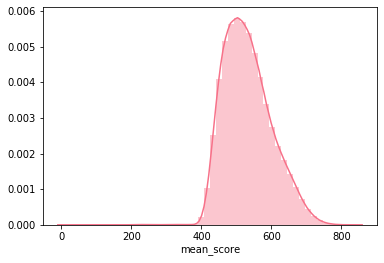

In [34]:
%matplotlib inline
sns.set_palette("husl")
sns.distplot(df['mean_score'])

In [35]:
school_type_mean = df.groupby('school_type')['mean_score'].mean()
school_type_mean

school_type
Exterior         593.112585
Não respondeu    533.903737
Privada          526.851752
Pública          509.077120
Name: mean_score, dtype: float64

Text(0, 0.5, 'Tipo de escola')

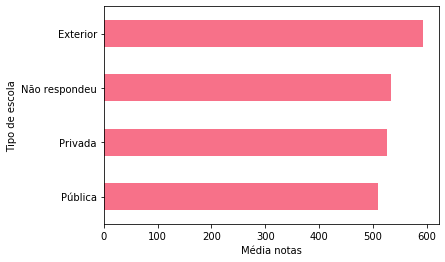

In [36]:
school_type_mean.nsmallest(4).plot.barh('Média das notas por tipo de escola')
plt.xlabel('Média notas')
plt.ylabel('Tipo de escola')

In [37]:
family_income_mean = df.groupby('family_income')['mean_score'].mean()
family_income_mean

family_income
Até R$ 954,00                          498.026098
De R$ 954,01 até R$ 1431,00            515.448495
De R$ R$ 11.448,01 até R$ 14.310,00    618.057835
De R$ R$ 14.310,01 até R$ 19.080,00    624.624857
De R$ R$ 1431,01 até R$ 1908,00        531.202939
De R$ R$ 1908,01 até R$ 2385,00        536.575423
De R$ R$ 2385,01 até R$ 2862,00        550.247892
De R$ R$ 2862,01 até R$ 3816,00        556.359024
De R$ R$ 3816,01 até R$ 4770,00        569.866874
De R$ R$ 4770,01 até R$ 5724,00        578.644676
De R$ R$ 5724,01 até R$ 6678,00        588.125109
De R$ R$ 6678,01 até R$ 7632,00        593.666054
De R$ R$ 7632,01 até R$ 8586,00        601.065077
De R$ R$ 8586,01 até R$ 9540,00        603.952882
De R$ R$ 9540,01 até R$ 11.448,00      611.080918
Mais de R$ 19.080,00                   633.381081
Nenhuma renda                          493.267743
Name: mean_score, dtype: float64

Text(0, 0.5, 'Renda familiar')

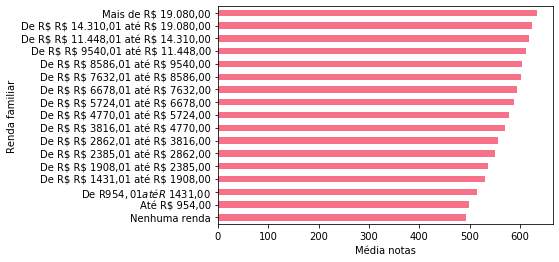

In [38]:
family_income_mean.nsmallest(17).plot.barh('Média das notas por renda familiar')
plt.xlabel('Média notas')
plt.ylabel('Renda familiar')

In [39]:
father_schooling_mean = df.groupby('father_schooling')['mean_score'].mean()
father_schooling_mean

father_schooling
Completou a 4ªserie/5ºano mas não completou a 8ªserie/9ºano    520.022639
Completou a 8ªsérie/9ºano mas não completou o ensino médio     528.145455
Completou a faculdade mas não completou a pós                  585.133283
Completou a pós-graduação                                      599.739594
Completou o ensino médio mas não a faculdade                   544.333679
Nunca estudou                                                  492.529258
Não completou a 4ªserie/5ºano                                  507.741298
Não sei                                                        514.907120
Name: mean_score, dtype: float64

Text(0, 0.5, 'Escolaridade do pai')

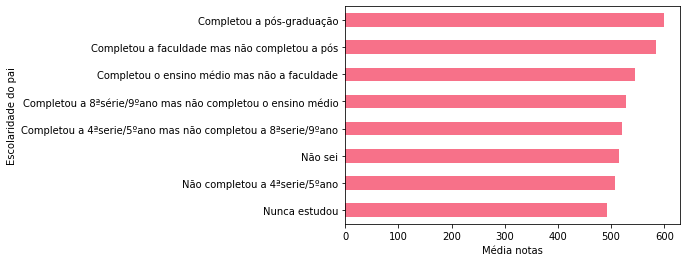

In [40]:
father_schooling_mean.nsmallest(8).plot.barh('Média das notas por escolaridade paterna')
plt.xlabel('Média notas')
plt.ylabel('Escolaridade do pai')

In [41]:
mother_schooling_mean = df.groupby('mother_schooling')['mean_score'].mean()
mother_schooling_mean

mother_schooling
Completou a 4ªserie/5ºano mas não completou a 8ªserie/9ºano    514.899167
Completou a 8ªsérie/9ºano mas não completou o ensino médio     521.350313
Completou a faculdade mas não completou a pós                  573.290604
Completou a pós-graduação                                      582.372673
Completou o ensino médio mas não a faculdade                   537.266351
Nunca estudou                                                  490.156854
Não completou a 4ªserie/5ºano                                  504.452621
Não sei                                                        505.072015
Name: mean_score, dtype: float64

Text(0, 0.5, 'Escolaridade da mãe')

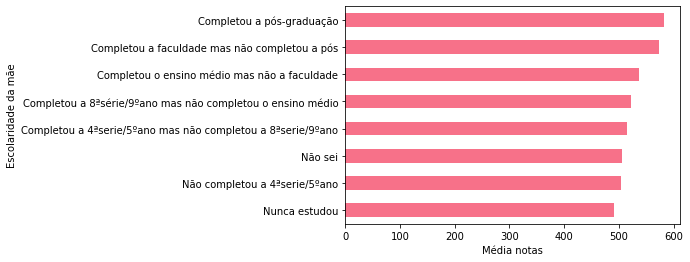

In [42]:
mother_schooling_mean.nsmallest(8).plot.barh('Média das notas por escolaridade materna')
plt.xlabel('Média notas')
plt.ylabel('Escolaridade da mãe')

In [43]:
df.nlargest(10, 'mean_score')

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_schooling,mother_schooling,family_income,has_computer,has_internet,color/race,school_type,mean_score
5365820,Brasília,DF,26,M,809.1,850.4,779.7,955.9,700.0,Não completou a 4ªserie/5ºano,Completou o ensino médio mas não a faculdade,"De R$ 954,01 até R$ 1431,00","Sim, um",Sim,Parda,Não respondeu,848.775
1231303,Teresina,PI,17,M,869.6,796.2,692.5,994.4,860.0,Completou a pós-graduação,Completou a pós-graduação,"De R$ R$ 8586,01 até R$ 9540,00","Sim, quatro ou mais",Sim,Parda,Exterior,838.175
2410529,Aracaju,SE,17,M,831.4,850.4,725.9,943.2,940.0,Completou a faculdade mas não completou a pós,Completou a faculdade mas não completou a pós,"De R$ R$ 3816,01 até R$ 4770,00","Sim, um",Sim,Branca,Exterior,837.725
414829,Juiz de Fora,MG,18,M,855.2,776.8,715.5,990.7,900.0,Completou a faculdade mas não completou a pós,Completou a faculdade mas não completou a pós,"De R$ R$ 14.310,01 até R$ 19.080,00","Sim, dois",Sim,Branca,Exterior,834.550
3204960,Natal,RN,17,M,839.1,825.8,705.4,964.8,920.0,Completou a pós-graduação,Completou a pós-graduação,"Mais de R$ 19.080,00","Sim, quatro ou mais",Sim,Branca,Exterior,833.775
2285611,Rio de Janeiro,RJ,20,M,849.8,768.5,716.3,996.1,900.0,Completou a faculdade mas não completou a pós,Completou a pós-graduação,"De R$ R$ 9540,01 até R$ 11.448,00","Sim, um",Sim,Não declarado,Não respondeu,832.675
2037194,Aracaju,SE,18,M,869.6,789.0,718.8,944.7,900.0,Completou a pós-graduação,Completou a pós-graduação,"Mais de R$ 19.080,00","Sim, três",Sim,Não declarado,Exterior,830.525
1750154,Vitória,ES,17,M,869.6,798.2,695.7,953.0,940.0,Completou a pós-graduação,Completou o ensino médio mas não a faculdade,"De R$ R$ 6678,01 até R$ 7632,00","Sim, três",Sim,Parda,Exterior,829.125
1464019,Brasília,DF,18,M,869.6,755.4,694.8,988.5,940.0,Completou a faculdade mas não completou a pós,Completou a faculdade mas não completou a pós,"Mais de R$ 19.080,00","Sim, três",Sim,Branca,Exterior,827.075
2502341,São Paulo,SP,17,M,819.1,794.4,726.6,968.0,920.0,Completou a faculdade mas não completou a pós,Completou a faculdade mas não completou a pós,"De R$ R$ 1908,01 até R$ 2385,00","Sim, quatro ou mais",Sim,Branca,Exterior,827.025


In [44]:
df.nsmallest(10, 'mean_score')

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_schooling,mother_schooling,family_income,has_computer,has_internet,color/race,school_type,mean_score
157170,Aracaju,SE,23,M,0.0,0.0,0.0,0.0,240.0,Não completou a 4ªserie/5ºano,Completou a 4ªserie/5ºano mas não completou a ...,"De R$ 954,01 até R$ 1431,00",Não,Sim,Parda,Não respondeu,0.0
348466,Bayeux,PB,28,M,0.0,0.0,0.0,0.0,340.0,Não completou a 4ªserie/5ºano,Completou o ensino médio mas não a faculdade,"De R$ 954,01 até R$ 1431,00",Não,Sim,Parda,Não respondeu,0.0
574255,Paulista,PE,50,F,0.0,0.0,0.0,0.0,0.0,Nunca estudou,Completou o ensino médio mas não a faculdade,Nenhuma renda,"Sim, um",Não,Parda,Não respondeu,0.0
910310,Contagem,MG,16,F,0.0,0.0,0.0,0.0,0.0,Completou a 4ªserie/5ºano mas não completou a ...,Completou a 8ªsérie/9ºano mas não completou o ...,"De R$ 954,01 até R$ 1431,00",Não,Sim,Parda,Não respondeu,0.0
1011422,São Luís,MA,39,M,0.0,0.0,0.0,0.0,260.0,Nunca estudou,Nunca estudou,"De R$ 954,01 até R$ 1431,00",Não,Sim,Preta,Não respondeu,0.0
1075911,Rio Bom,PR,21,M,0.0,0.0,0.0,0.0,320.0,Completou a 4ªserie/5ºano mas não completou a ...,Completou a 8ªsérie/9ºano mas não completou o ...,"De R$ 954,01 até R$ 1431,00",Não,Não,Parda,Não respondeu,0.0
1141773,Juazeiro,BA,41,M,0.0,0.0,0.0,0.0,0.0,Completou a faculdade mas não completou a pós,Completou o ensino médio mas não a faculdade,Nenhuma renda,Não,Não,Parda,Não respondeu,0.0
1261378,Messias Targino,RN,45,M,0.0,0.0,0.0,0.0,0.0,Não sei,Não sei,"Até R$ 954,00",Não,Não,Parda,Não respondeu,0.0
1311126,Lorena,SP,40,F,0.0,0.0,0.0,0.0,0.0,Não completou a 4ªserie/5ºano,Não completou a 4ªserie/5ºano,"Até R$ 954,00","Sim, dois",Não,Branca,Não respondeu,0.0
1403157,Parnamirim,RN,31,F,0.0,0.0,0.0,0.0,0.0,Não completou a 4ªserie/5ºano,Não sei,"Até R$ 954,00",Não,Não,Parda,Não respondeu,0.0


In [45]:
df_public = df.loc[df['school_type'] == 'Pública']
df_public.shape

(840352, 17)

In [46]:
df_private = df.loc[df['school_type'] == 'Privada']
df_private.shape

(9762, 17)

In [47]:
mean_diff = abs(df_public['mean_score'].mean() - df_private['mean_score'].mean())
mean_diff

17.774631298998827

In [48]:
import statsmodels.api as sm

In [72]:
n1 = df_public['mean_score']
n2 = df_private['mean_score']

result = sm.stats.ttest_ind(x1=n1, x2=n2, value=0, alternative='two-sided', weights=(None, None), usevar='pooled')

In [73]:
def hipo_result(result):
    if result <= 0.5:
        print('Rejeita-se a hipótese nula')
    else:
        print('Falha em rejeitar a hipótese nula')

In [74]:
hipo_result(result[1])

Rejeita-se a hipótese nula


In [75]:
result

(-30.956984921007273, 2.6816306352664843e-210, 850112.0)

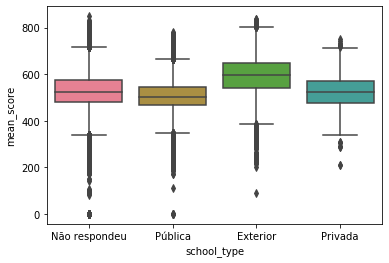

In [55]:
sns.boxplot(x=df['school_type'], y=df['mean_score'], data=df)

In [57]:
df_low_income = df.loc[ (df['family_income'] == 'Nenhuma renda') | (df['family_income'] == 'Até R$ 954,00') | 
                        (df['family_income'] == 'De R$ 954,01 até R$ 1431,00') | 
                        (df['family_income'] == 'De R$ R$ 1431,01 até R$ 1908,00') | 
                        (df['family_income'] == 'De R$ R$ 1908,01 até R$ 2385,00') | 
                        (df['family_income'] == 'De R$ R$ 2385,01 até R$ 2862,00') ]
df_low_income.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_schooling,mother_schooling,family_income,has_computer,has_internet,color/race,school_type,mean_score
1,São João dos Patos,MA,23,F,521.0,568.7,513.1,480.3,280.0,Não completou a 4ªserie/5ºano,Não completou a 4ªserie/5ºano,"Até R$ 954,00",Não,Não,Parda,Não respondeu,520.775
5,João Pessoa,PB,23,F,461.8,564.0,466.8,538.8,580.0,Completou a 4ªserie/5ºano mas não completou a ...,Completou a 8ªsérie/9ºano mas não completou o ...,"Até R$ 954,00","Sim, um",Sim,Branca,Não respondeu,507.850
8,Fortaleza,CE,19,M,411.8,429.8,445.2,459.0,340.0,Completou a 8ªsérie/9ºano mas não completou o ...,Completou a 8ªsérie/9ºano mas não completou o ...,"De R$ 954,01 até R$ 1431,00",Não,Não,Parda,Pública,436.450
9,Cuiabá,MT,25,F,469.4,650.2,606.6,525.4,740.0,Completou a 4ªserie/5ºano mas não completou a ...,Completou a 4ªserie/5ºano mas não completou a ...,"De R$ 954,01 até R$ 1431,00",Não,Não,Parda,Não respondeu,562.900
12,Gurupi,TO,18,F,467.4,640.5,516.7,642.3,640.0,Completou o ensino médio mas não a faculdade,Completou o ensino médio mas não a faculdade,"Até R$ 954,00",Não,Não,Preta,Não respondeu,566.725


In [59]:
df_low_income.shape

(2924003, 17)

In [60]:
df_medium_income = df.loc[(df['family_income'] == 'De R$ R$ 2862,01 até R$ 3816,00') | 
                          (df['family_income'] == 'De R$ R$ 3816,01 até R$ 4770,00') | 
                          (df['family_income'] == 'De R$ R$ 4770,01 até R$ 5724,00') | 
                          (df['family_income'] == 'De R$ R$ 5724,01 até R$ 6678,00') ]
df_medium_income.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_schooling,mother_schooling,family_income,has_computer,has_internet,color/race,school_type,mean_score
7,Parnaíba,PI,39,M,499.3,663.2,605.2,733.8,680.0,Nunca estudou,Completou o ensino médio mas não a faculdade,"De R$ R$ 3816,01 até R$ 4770,00","Sim, um",Sim,Parda,Não respondeu,625.375
28,Getúlio Vargas,RS,24,F,514.7,576.6,512.2,500.7,540.0,Completou a 4ªserie/5ºano mas não completou a ...,Completou a 8ªsérie/9ºano mas não completou o ...,"De R$ R$ 3816,01 até R$ 4770,00","Sim, dois",Sim,Branca,Não respondeu,526.050
31,Guarulhos,SP,16,F,433.9,618.2,635.2,432.3,500.0,Completou a 4ªserie/5ºano mas não completou a ...,Completou a 4ªserie/5ºano mas não completou a ...,"De R$ R$ 3816,01 até R$ 4770,00","Sim, um",Sim,Branca,Não respondeu,529.900
55,Bauru,SP,21,M,484.6,636.0,565.5,603.9,680.0,Completou a pós-graduação,Completou a 8ªsérie/9ºano mas não completou o ...,"De R$ R$ 2862,01 até R$ 3816,00","Sim, um",Sim,Branca,Não respondeu,572.500
78,São Paulo,SP,39,F,423.4,436.4,409.7,525.9,780.0,Completou a 4ªserie/5ºano mas não completou a ...,Não completou a 4ªserie/5ºano,"De R$ R$ 5724,01 até R$ 6678,00","Sim, dois",Sim,Parda,Não respondeu,448.850


In [61]:
df_medium_income.shape

(664514, 17)

In [62]:
df_high_income = df.loc[(df['family_income'] == 'De R$ R$ 6678,01 até R$ 7632,00') | 
                        (df['family_income'] == 'De R$ R$ 7632,01 até R$ 8586,00') | 
                        (df['family_income'] == 'De R$ R$ 8586,01 até R$ 9540,00') | 
                        (df['family_income'] == 'De R$ R$ 9540,01 até R$ 11.448,00') |
                        (df['family_income'] == 'De R$ R$ 11.448,01 até R$ 14.310,00')]
df_high_income.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_schooling,mother_schooling,family_income,has_computer,has_internet,color/race,school_type,mean_score
459,Campinas,SP,17,M,611.7,594.5,593.9,496.2,680.0,Completou o ensino médio mas não a faculdade,Completou a faculdade mas não completou a pós,"De R$ R$ 8586,01 até R$ 9540,00","Sim, um",Sim,Branca,Não respondeu,574.075
522,Rio de Janeiro,RJ,22,F,431.7,560.9,479.7,557.0,560.0,Completou a faculdade mas não completou a pós,Não completou a 4ªserie/5ºano,"De R$ R$ 8586,01 até R$ 9540,00","Sim, dois",Sim,Parda,Pública,507.325
559,Santos,SP,18,M,574.6,620.1,573.1,495.1,500.0,Completou a faculdade mas não completou a pós,Completou a pós-graduação,"De R$ R$ 6678,01 até R$ 7632,00","Sim, um",Sim,Branca,Pública,565.725
1017,Cotia,SP,25,M,594.9,665.9,654.4,616.3,480.0,Completou a pós-graduação,Completou a pós-graduação,"De R$ R$ 7632,01 até R$ 8586,00","Sim, dois",Sim,Branca,Não respondeu,632.875
1102,Diadema,SP,18,F,660.6,671.1,668.0,732.0,800.0,Completou a pós-graduação,Completou a faculdade mas não completou a pós,"De R$ R$ 6678,01 até R$ 7632,00","Sim, dois",Sim,Branca,Não respondeu,682.925


In [63]:
df_high_income.shape

(224752, 17)

In [64]:
df_max_income = df.loc[df['family_income'] == 'Mais de R$ 19.080,00']
df_max_income.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_schooling,mother_schooling,family_income,has_computer,has_internet,color/race,school_type,mean_score
1660,Americana,SP,20,F,637.4,640.5,664.4,767.8,940.0,Completou a pós-graduação,Completou a faculdade mas não completou a pós,"Mais de R$ 19.080,00","Sim, três",Sim,Branca,Não respondeu,677.525
1697,Parnamirim,RN,19,M,692.6,687.9,642.4,787.2,940.0,Completou a faculdade mas não completou a pós,Completou o ensino médio mas não a faculdade,"Mais de R$ 19.080,00","Sim, três",Sim,Branca,Não respondeu,702.525
1968,Brasília,DF,15,F,481.4,647.9,624.1,590.2,380.0,Completou o ensino médio mas não a faculdade,Completou a pós-graduação,"Mais de R$ 19.080,00","Sim, três",Sim,Branca,Não respondeu,585.900
2021,Fortaleza,CE,19,M,728.9,717.4,702.8,947.1,940.0,Completou a pós-graduação,Completou a pós-graduação,"Mais de R$ 19.080,00","Sim, um",Sim,Branca,Não respondeu,774.050
2450,São Paulo,SP,18,M,727.4,718.4,645.0,751.3,900.0,Completou o ensino médio mas não a faculdade,Completou a pós-graduação,"Mais de R$ 19.080,00","Sim, quatro ou mais",Sim,Branca,Exterior,710.525


In [65]:
df_max_income.shape

(45020, 17)

In [81]:
n3 = df_low_income['mean_score']
n4 = df_medium_income['mean_score']

result2 = sm.stats.ttest_ind(x1=n3, x2=n4, value=0, alternative='two-sided', weights=(None, None), usevar='pooled')

In [77]:
hipo_result(result2[1])

Rejeita-se a hipótese nula


In [78]:
result2

(-642.3952374962714, 0.0, 3588515.0)

In [80]:
n5 = df_high_income['mean_score']

result3 = sm.stats.ttest_ind(x1=n4, x2=n5, value=0, alternative='two-sided', weights=(None, None), usevar='pooled')

In [82]:
hipo_result(result3[1])

Rejeita-se a hipótese nula


In [83]:
result3

(-222.14865900280435, 0.0, 889264.0)

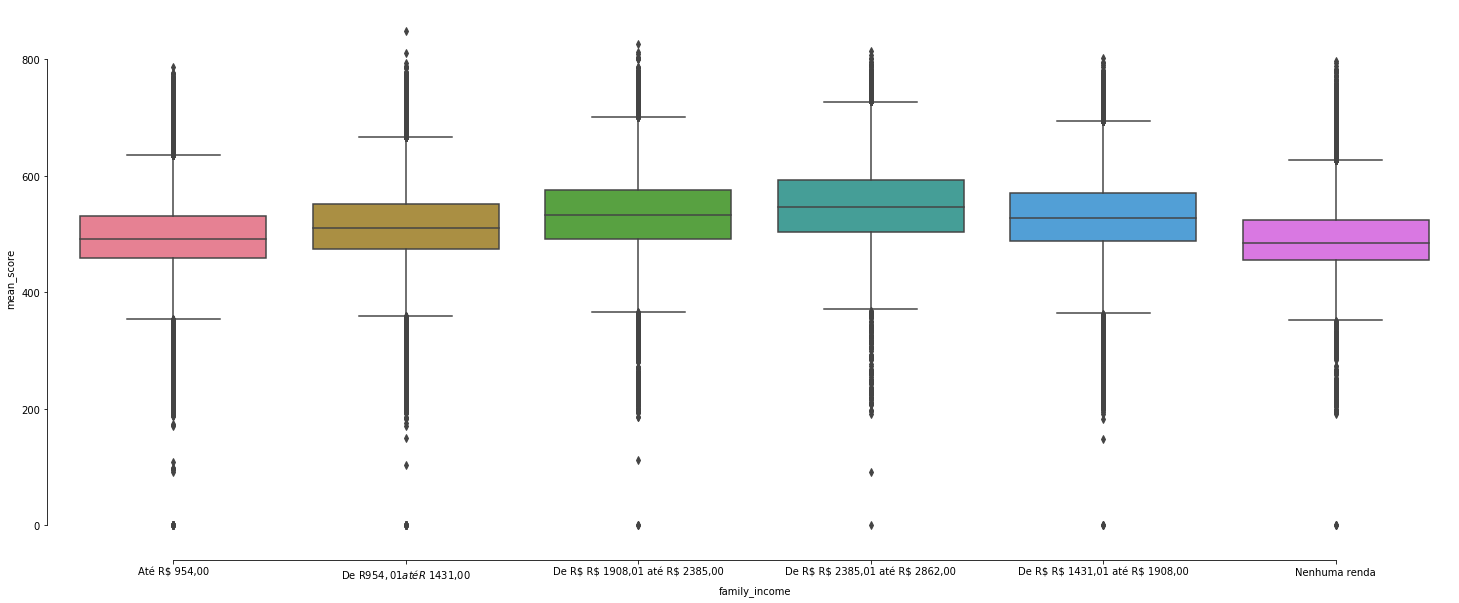

In [88]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df_low_income['family_income'], y=df['mean_score'], data=df)
sns.despine(offset=10, trim=True)